### Tennis ###
By:<br>
\-> Vlad Liviu Alexandru <br>
\-> Sandu Victor Iulian<br>

_**Run [Setup](#setup) before anything else!**_<br>


Data sources: [Jeff Sackmann (GitHub)](https://github.com/JeffSackmann/tennis_atp)<br>
Variables descriptions: [Jeff Sackmann (GitHub)](https://github.com/JeffSackmann/tennis_atp/blob/master/matches_data_dictionary.txt)

### Setup ###

In [1]:
# ========== CONFIGURATION =========

# If set to false, disables printing of big data like tables.
# Default: False
ShowBigPrints = True


# ============= Imports ============
import pandas as pd
import numpy as np
import dateutil as du
import re
import statsmodels.api as sm

from itertools import permutations
from itertools import product

# ======== Global variables ========
class Paths:
  atp_matches_2020 = r".\data\atp_matches_2020.csv"

data = pd.read_csv(Paths.atp_matches_2020)

# ========== Custom logic ==========
def cfp(f, *a): # custom function print
  if ShowBigPrints:
    f(*a)
  else:
    print("> Big print hidden.")

def cp(*a): # custom print
  cfp(print, *a)

def p(*a):
  print(*a)

### 1. Data processing ###

In [12]:
# Turn int to date object
data['tourney_date'] = data['tourney_date'].astype(str).apply(du.parser.parse)

# Create unique id
if data.columns[0] != 'Id':
  data.insert(0, 'Id', data['tourney_id'].astype(str) + '-' + data['match_num'].astype(str))

# Deleting columns that are not necessary
data.drop(columns= [c for c in data.columns.to_list() if re.search('(seed|entry)', c)], inplace=True)

In [14]:
# Initial Dataset
p(f"{{'Dataset:':<13}} atp_matches_2020")
p(f"{{'Variables:':<13}} {data.shape[1]}")
p(f"{{'Observations:':<13}} {data.shape[0]}")
cfp(display, data)

{'Dataset:':<13} atp_matches_2020
{'Variables:':<13} 46
{'Observations:':<13} 1462


,Id,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2020-8888-300,2020-8888,Atp Cup,Hard,24,A,2020-01-06,300,104925,Novak Djokovic,...,51.0,39.0,6.0,10.0,6.0,8.0,2.0,9055.0,1.0,9985.0
1,2020-8888-299,2020-8888,Atp Cup,Hard,24,A,2020-01-06,299,105138,Roberto Bautista Agut,...,35.0,21.0,6.0,9.0,5.0,10.0,10.0,2335.0,34.0,1251.0
2,2020-8888-298,2020-8888,Atp Cup,Hard,24,A,2020-01-06,298,104925,Novak Djokovic,...,57.0,35.0,25.0,14.0,6.0,11.0,2.0,9055.0,5.0,5705.0
3,2020-8888-297,2020-8888,Atp Cup,Hard,24,A,2020-01-06,297,105583,Dusan Lajovic,...,54.0,39.0,14.0,12.0,0.0,1.0,34.0,1251.0,17.0,1840.0
4,2020-8888-296,2020-8888,Atp Cup,Hard,24,A,2020-01-06,296,104745,Rafael Nadal,...,55.0,37.0,10.0,14.0,1.0,5.0,1.0,9985.0,18.0,1775.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2020-7485-125,2020-7485,Antwerp,Hard,32,A,2020-10-19,125,105554,Daniel Evans,...,43.0,31.0,14.0,13.0,3.0,7.0,35.0,1384.0,79.0,802.0
1458,2020-7485-126,2020-7485,Antwerp,Hard,32,A,2020-10-19,126,200267,Zizou Bergs,...,45.0,27.0,10.0,12.0,4.0,9.0,528.0,58.0,45.0,1165.0
1459,2020-7485-128,2020-7485,Antwerp,Hard,32,A,2020-10-19,128,126203,Taylor Fritz,...,37.0,30.0,5.0,9.0,3.0,5.0,28.0,1670.0,33.0,1402.0
1460,2020-7485-129,2020-7485,Antwerp,Hard,32,A,2020-10-19,129,144750,Lloyd Harris,...,45.0,29.0,5.0,10.0,7.0,11.0,90.0,748.0,74.0,838.0


### 1.1 About the data


Here is the explanation of each column in the DataFrame:

- `Id`: Unique identifier for each match.
- `tourney_id`: Identifier for the tournament.
- `tourney_name`: Name of the tournament.
- `surface`: Surface type of the court (e.g., Hard, Clay, Grass).
- `draw_size`: Number of players participating in the tournament.
- `tourney_level`: Level of the tournament (e.g., A for ATP Tour, G for Grand Slam).
- `tourney_date`: Date of the tournament.
- `match_num`: Match number within the tournament.
- `winner_id`: Unique identifier for the winner player.
- `winner_seed`: Seed of the winner player.
- `winner_entry`: Entry type of the winner player (e.g., WC for Wild Card, Q for Qualifier).
- `winner_name`: Name of the winner player.
- `winner_hand`: Dominant hand of the winner player (e.g., R for Right, L for Left).
- `winner_ht`: Height of the winner player.
- `winner_ioc`: Country code of the winner player.
- `winner_age`: Age of the winner player.
- `loser_id`: Unique identifier for the loser player.
- `loser_seed`: Seed of the loser player.
- `loser_entry`: Entry type of the loser player.
- `loser_name`: Name of the loser player.
- `loser_hand`: Dominant hand of the loser player.
- `loser_ht`: Height of the loser player.
- `loser_ioc`: Country code of the loser player.
- `loser_age`: Age of the loser player.
- `score`: Match score.
- `best_of`: Number of sets required to win the match.
- `round`: Round of the tournament.
- `minutes`: Duration of the match in minutes.
- `w_ace`: Number of aces hit by the winner player.
- `w_df`: Number of double faults committed by the winner player.
- `w_svpt`: Number of service points played by the winner player.
- `w_1stIn`: Number of first serves in by the winner player.
- `w_1stWon`: Number of first serve points won by the winner player.
- `w_2ndWon`: Number of second serve points won by the winner player.
- `w_SvGms`: Number of service games won by the winner player.
- `w_bpSaved`: Number of break points saved by the winner player.
- `w_bpFaced`: Number of break points faced by the winner player.
- `l_ace`: Number of aces hit by the loser player.
- `l_df`: Number of double faults committed by the loser player.
- `l_svpt`: Number of service points played by the loser player.
- `l_1stIn`: Number of first serves in by the loser player.
- `l_1stWon`: Number of first serve points won by the loser player.
- `l_2ndWon`: Number of second serve points won by the loser player.
- `l_SvGms`: Number of service games won by the loser player.
- `l_bpSaved`: Number of break points saved by the loser player.
- `l_bpFaced`: Number of break points faced by the loser player.
- `winner_rank`: Ranking of the winner player.
- `winner_rank_points`: Ranking points of the winner player.
- `loser_rank`: Ranking of the loser player.
- `loser_rank_points`: Ranking points of the loser player.

### 2. Computations ###

#### 2.1 Dominant hand wins vs loses

Firstly, we will compute the win percentage of players based on their hand preference

In [16]:
labels = {\
  'R': f'{{{"Right-handed":<13}}}',\
  'L': f'{{{"Left-handed":<13}}}',\
  'U': f'{{{"Unknown":<13}}}',\
}

wins = {l: (sum(data['winner_hand']==l), sum(data['loser_hand']==l)) for l in labels.keys()}


for l in list(labels.keys()):
  p((\
    f'{labels[l]}'
    f'{{wins: {wins[l][0]:>4}, '
    f'loses: {wins[l][1]:>4} }}'
  ))

{Right-handed }{wins: 1238, loses: 1242 }
{Left-handed  }{wins:  206, loses:  206 }
{Unknown      }{wins:   18, loses:   10 }


Now, we'll compute the actual percentages by dividing our findings to the total

In [17]:
wins = {l: (*wins[l], wins[l][0]/sum(wins[l]), wins[l][0]/data['winner_hand'].count()) for l in labels.keys()}

for l in list(labels.keys()):
  p((\
    f'{labels[l]}'
    f'{{ wins: {wins[l][0]:>4} '
    f'loses: {wins[l][1]:>4} '
    f'win: {round(wins[l][2]*100,2):>5}% '
    f'Total: {round(wins[l][3]*100,2):>5}% '
    f'}}'
  ))

{Right-handed }{ wins: 1238 loses: 1242 win: 49.92% Total: 84.68% }
{Left-handed  }{ wins:  206 loses:  206 win:  50.0% Total: 14.09% }
{Unknown      }{ wins:   18 loses:   10 win: 64.29% Total:  1.23% }


Now we compute the number of games for each type of matchup where the winner hand type is on the left.

In [18]:
if 'U' in labels: del labels['U']
perms = list(product(labels.keys(), repeat=2))

matchups = {\
  f'{perm[0]}-{perm[1]}':\
  data[(data['winner_hand'] == perm[0]) & (data['loser_hand'] == perm[1])].shape[0]\
  for perm in perms
  }

for m in matchups.keys():
  p(f'{m}: {matchups[m]}')



R-R: 1056
R-L: 172
L-R: 173
L-L: 33


#### 2.2 Multiple regression analysis (Winner's Age, Loser's Age, and the duration of the match)

In [19]:
mean_age = data[['winner_age', 'loser_age']].mean()
p(mean_age)

winner_age    26.911765
loser_age     27.252257
dtype: float64


In [25]:
X = data[['loser_age', 'winner_age']];
y = data['winner_rank']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
p(est.summary())

                            OLS Regression Results                            
Dep. Variable:              loser_age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3782
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.539
Time:                        19:51:38   Log-Likelihood:                -4315.3
No. Observations:                1462   AIC:                             8635.
Df Residuals:                    1460   BIC:                             8645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8257      0.704     38.095      0.0

In this case, both 'loser_age' and 'winner_age' are significant predictors of 'winner_rank' at the 0.05 level (p-values are less than 0.05).

The R-squared value is 0.029, which means that only 2.9% of the variance in 'winner_rank' can be explained by 'loser_age' and 'winner_age'. This is a low value, indicating that the model does not fit the data well.

The Durbin-Watson statistic is 1.377, which is close to 2, suggesting no autocorrelation.

The Omnibus and Jarque-Bera (JB) tests are used to check the normality of the residuals. The p-values are less than 0.05, indicating that the residuals are not normally distributed.

The skewness and kurtosis values provide information about the shape of the distribution of the residuals. A skewness value close to 0 indicates symmetry, while a kurtosis value close to 3 indicates a normal distribution. In this case, the skewness is 5.903 and kurtosis is 51.284, indicating a significant deviation from normality.

The Cond. No. (Condition Number) is a measure of the sensitivity of the function's output to its input. A high condition number indicates a high degree of multicollinearity (or correlation between predictors), which can make the model unstable. In this case, the condition number is 317, which is not particularly high.

#### 2.3 Graphical representation of number of wins for each age

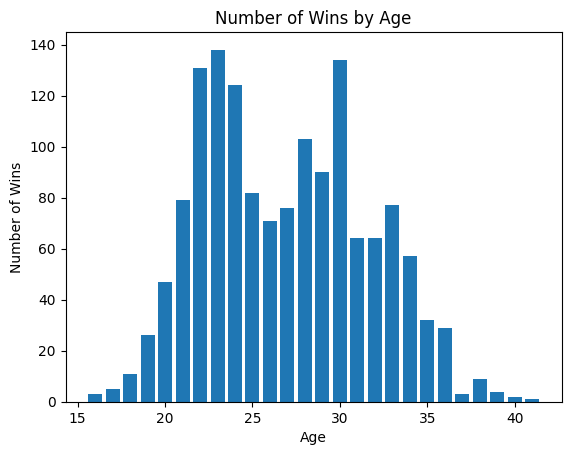

In [37]:
wins_by_age = data['winner_age'].round().value_counts()
import matplotlib.pyplot as plt

# Plot the wins_by_age variable
plt.bar(wins_by_age.index, wins_by_age.values)

# Set the x-axis label
plt.xlabel('Age')

# Set the y-axis label
plt.ylabel('Number of Wins')

# Set the title of the graph
plt.title('Number of Wins by Age')

# Display the graph
plt.show()



### Python Requirements solved: ###

- accessing data with loc and iloc<br>
- processing of data sets with merge / join<br>
- using scikit-learn package (clustering, logistic regression)<br>
<br>
- ~~graphical representation of the data with the matplotlib package~~<br>
- ~~using statmodels package (multiple regression).~~<br>
- ~~using lists and dictionaries, including their specific methods~~<br>
- ~~using sets and tuples, including their specific methods~~<br>
- ~~defining and calling some functions~~<br>
- ~~using conditional structures~~<br>
- ~~using repetitive structures~~<br>
- ~~importing a csv or json file into the pandas package~~<br>
- ~~modifying data in the pandas package~~<br>
- ~~using group functions~~<br>
- ~~dealing with missing values~~<br>
- ~~deleting columns and records~~<br>
- ~~statistical processing, grouping and aggregation of data in the pandas package~~<br>
